# Fisher's Iris

## Introduction

From the Wikipedia article [“Iris flower data set”](https://en.wikipedia.org/wiki/Iris_flower_data_set)

>The Iris flower data set or Fisher’s Iris data set is a multivariate data set introduced by Ronald Fisher in his 1936 paper "The use of multiple measurements in taxonomic problems as an example of linear discriminant analysis". It is sometimes called Anderson’s Iris data set because Edgar Anderson collected the data to quantify the variation of Iris flowers.

>The data set consists of 50 samples from each of three species of Iris (Iris setosa, Iris virginica and Iris versicolor). Four features were measured from each sample: the length and the width of the sepals and petals, in centimetres.

To download this data into an Excel spreadsheet, click on [Fisher's Iris](https://raw.githubusercontent.com/uiuc-cse/data-fa14/gh-pages/data/iris.csv)

## Preliminaries

In [1]:
# numpy efficiently deals with numerical multi-dimensional arrays.
import numpy as np

# matplotlib is a plotting library, and pyplot is its easy-to-use module.
import matplotlib.pyplot as pl

# This just sets the default plot size to be bigger.
pl.rcParams['figure.figsize'] = (16.0, 8.0)

### load data

In [2]:
# Load data
OriginalData = np.loadtxt("iris.csv",str, delimiter=",", skiprows=1, unpack=True)
# Transposing the data
data = OriginalData.transpose()
# get each column
sepal_length = sepal_width = petal_length = petal_width = species =[]
sepal_length , sepal_width , petal_length , petal_width , species = OriginalData


### create a simple plot

Create a scatter plot of sepal length on the x-axis versus sepal width on the y-axis. 

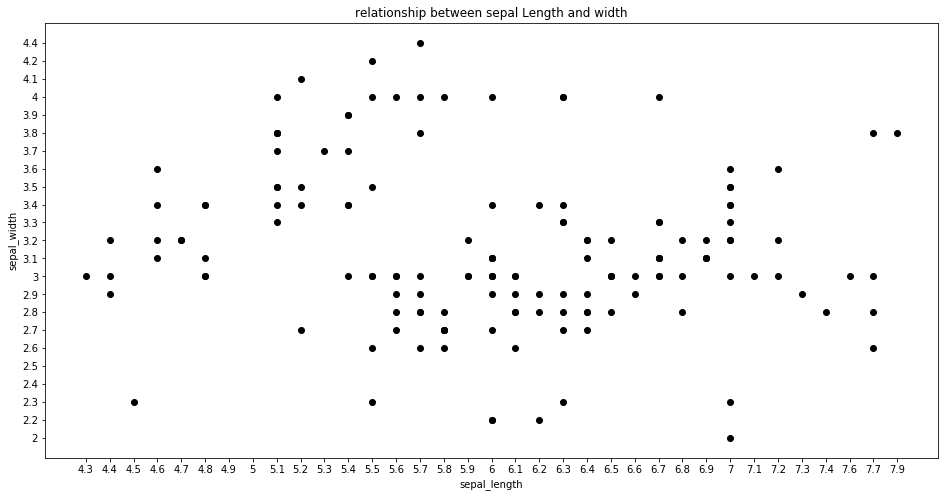

In [3]:
# Create the plot.
pl.scatter(sepal_length, sepal_width, c='black')

# Set some properties for the plot.
pl.xlabel('sepal_length')
pl.ylabel('sepal_width')

# Show the plot.
pl.title('relationship between sepal Length and width')
pl.show()

### a more complex plot

Re-create the above plot, but this time plot the setosa data points in red, the versicolor data point in green, and the virginica data points in blue.

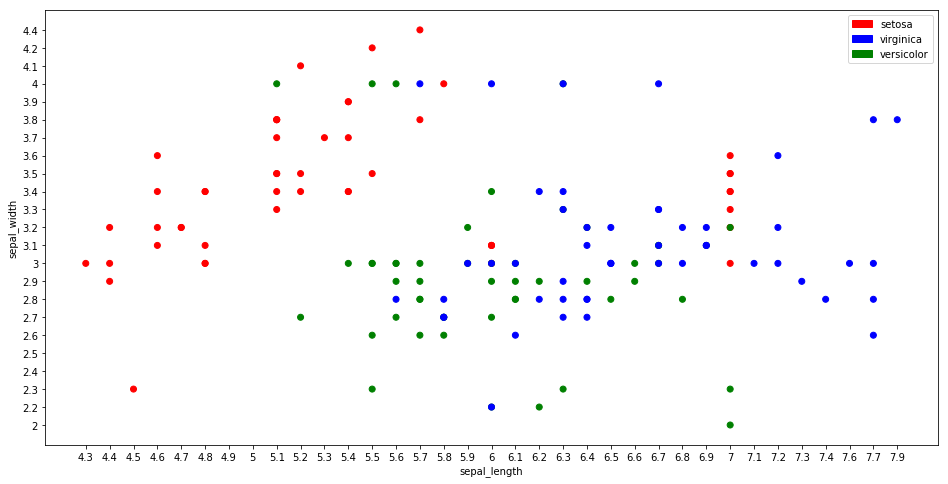

In [4]:

# copy of data as numpy.array
_data=np.array(data)

# replase '_data', column 'species' to colors
# adapt from : https://stackoverflow.com/questions/20355311/how-to-replace-values-in-a-numpy-array-based-on-another-column
_data[_data[:,4] == 'setosa',4] = 'red'
_data[_data[:,4] == 'virginica',4] = 'blue'
_data[_data[:,4] == 'versicolor',4] = 'green'

# create a color and label set        
colors = np.array(_data)[:,4]
labels = np.array(data)[:,4]

# Create the plot.
pl.scatter(sepal_length, sepal_width, c=colors, label=labels)

# match label for colors
# adap from : https://stackoverflow.com/questions/44164111/setting-a-legend-matching-the-colours-in-pyplot-scatter/44164349#44164349
import matplotlib.patches as mpatches
handles = [mpatches.Patch(color=colour, label=label) for label, colour in [('setosa', 'red'), ('virginica', 'blue'), ('versicolor', 'green')]]
pl.legend(handles=handles)

# Set some properties for the plot.
pl.xlabel('sepal_length')
pl.ylabel('sepal_width')

# Show the plot
pl.show()

### Use seaborn

Use the [seaborn](http://seaborn.pydata.org/examples/scatterplot_matrix.html) library to create a scatterplot matrix of all five variables.

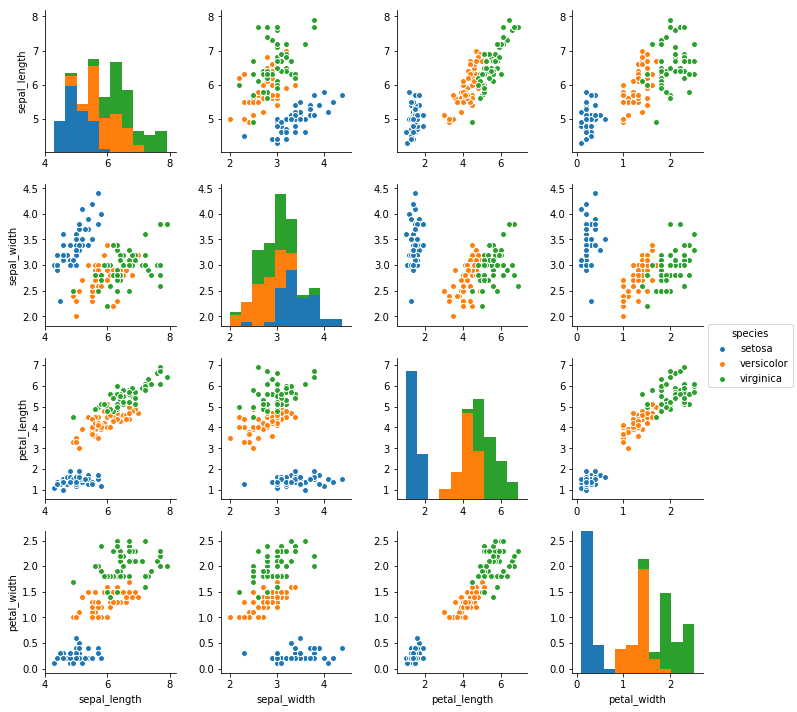

In [5]:
# use pandas reload iris.csv
import pandas
iris = pandas.read_csv('iris.csv')

# use seaborn library show plots
import seaborn
seaborn.pairplot(iris, hue="species")
pl.show()

### Fit a line

Fit a straight line to the variables **petal length** and **petal width** for the whole data set. Plot the data points in a scatter plot with the best fit line shown

*straight lines, pick a model:*  $$ y = m * x + c $$

*calculating the cost:*  $$ \sum_i (y_i - mx_i - c)^2 $$

```cost = lambda m,c: np.sum([(petal_width[i] - m * petal_length[i] - c)**2 for i in range(petal_width.size)])```

*minimising the cost:*

*recall that the cost is:*
$$ Cost(m, c) = \sum_i (y_i - mx_i - c)^2 $$


In [6]:
# here, just use the numpy.polyfit function to get the best values for m and c.
petal_length = np.array(petal_length).astype(np.float)
petal_width = np.array(petal_width).astype(np.float)
m,c=np.polyfit(petal_length, petal_width, 1)
print("m is %8.6f and c is %6.6f." % (m, c))

m is 0.416419 and c is -0.366514.


*plot the data points in a scatter plot with the best fit line shown.*

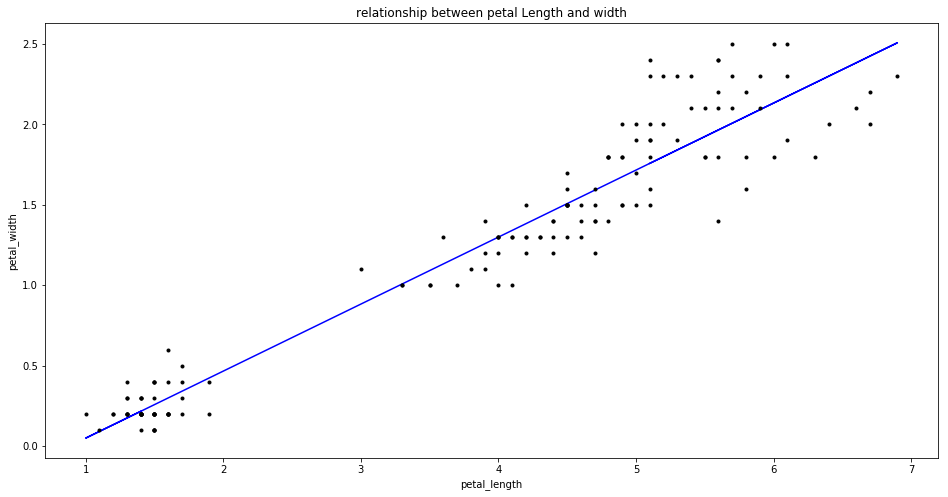

In [7]:
# Create the plot.
pl.plot(petal_length, m * petal_length + c, 'b-')
pl.plot(petal_length, petal_width, 'k.')

# Set some properties for the plot.
pl.xlabel('petal_length')
pl.ylabel('petal_width')

# Show the plot.
pl.title('relationship between petal Length and width')
pl.show()

### Calculate the R-squared value

calculate the R-squared value for your line above.

formula:
$$ R^2 = 1 - \frac{\sum_i (y_i - m x_i - c)^2}{\sum_i (y_i - \bar{y})^2} $$

In [8]:
# here, just use the numpy.corrcoef function to get the same value.
rsq = np.corrcoef(petal_length, petal_width)[0][1]**2
print("The R-squared value is %6.4f" % rsq)

The R-squared value is 0.9269
